In [2]:
%pip install matplotlib numpy scipy pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 121 kB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 158 kB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 118 kB/s eta 0:00:01
     |████████████████████████████████| 10.8 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 374 kB/s eta 0:00:01
     |████████████████████████████████| 509 kB 695 kB/s eta 0:00:01
     |████████████████████████████████| 347 kB 1.3 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the ke

In [6]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# On ajoute le dossier parent au path pour importer nos modules src
sys.path.append(os.path.abspath('..'))

from src.generators.lcg import LCG
from src.generators.mt_wrapper import MT19937
from src.generators.system_rng import SystemRNG
from src.generators.box_muller import BoxMuller

# Configuration des plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

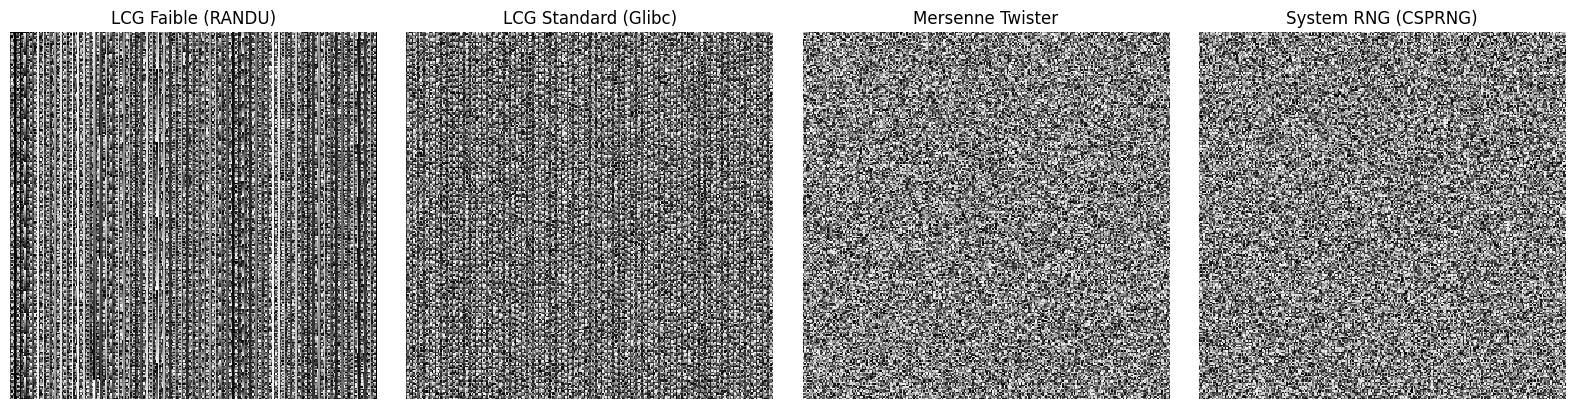

In [7]:
def plot_bitmap(generator, title, size=256):
    """Génère une image (bitmap) carrée à partir du générateur."""
    # On génère size*size octets
    data = generator.next_bytes(size * size)
    
    # Transformation en matrice 2D (0 ou 1 pour le contraste, ou 0-255 en gris)
    # Ici on prend 0-255 pour voir des niveaux de gris
    pixels = np.frombuffer(data, dtype=np.uint8).reshape((size, size))
    
    plt.imshow(pixels, cmap='gray', interpolation='nearest')
    plt.title(title)
    plt.axis('off')

# Création des générateurs
# 1. Un "Mauvais" LCG (paramètres faibles pour l'exemple visuel)
# RANDU est un célèbre mauvais LCG : a=65539, c=0, m=2^31
bad_lcg = LCG(seed=1, a=65539, c=0, m=2**31)

# 2. Le LCG Standard (Glibc)
std_lcg = LCG(seed=42)

# 3. Mersenne Twister
mt = MT19937(seed=42)

# 4. System RNG (Crypto Sûr)
sys_rng = SystemRNG()

# Affichage côte à côte
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plot_bitmap(bad_lcg, "LCG Faible (RANDU)")

plt.subplot(1, 4, 2)
plot_bitmap(std_lcg, "LCG Standard (Glibc)")

plt.subplot(1, 4, 3)
plot_bitmap(mt, "Mersenne Twister")

plt.subplot(1, 4, 4)
plot_bitmap(sys_rng, "System RNG (CSPRNG)")

plt.tight_layout()
plt.show()

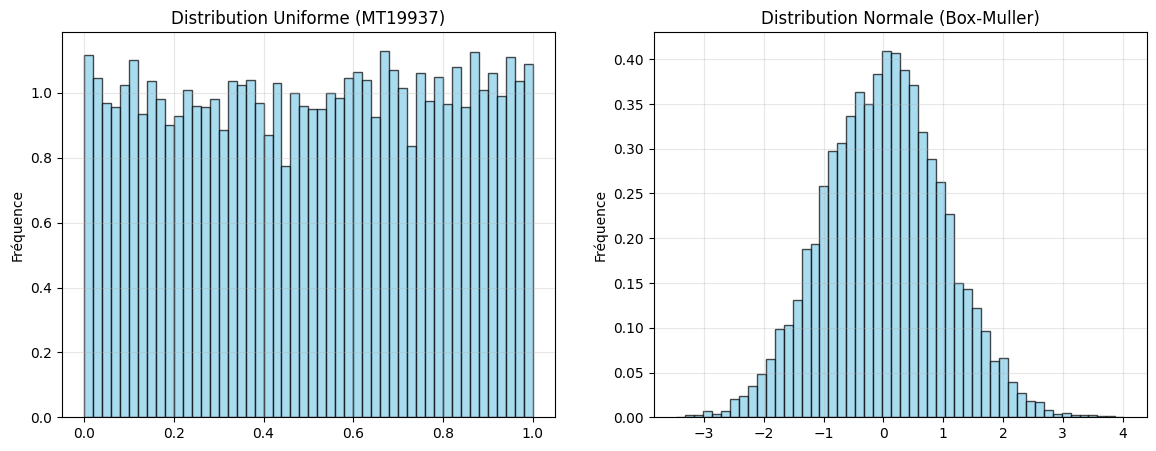

In [8]:
def plot_histogram(generator_func, title, bins=50, n_samples=10000):
    """Trace l'histogramme des valeurs générées."""
    values = [generator_func() for _ in range(n_samples)]
    
    plt.hist(values, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.ylabel('Fréquence')
    plt.grid(True, alpha=0.3)

# Instanciation Box Muller
bm = BoxMuller()

plt.figure(figsize=(14, 5))

# 1. Distribution Uniforme (MT19937)
plt.subplot(1, 2, 1)
# On normalise pour avoir entre 0 et 1
mt_gen = MT19937()
plot_histogram(lambda: mt_gen.next_int() / (2**32), "Distribution Uniforme (MT19937)")

# 2. Distribution Normale (Box-Muller)
plt.subplot(1, 2, 2)
plot_histogram(lambda: bm.next_sample(), "Distribution Normale (Box-Muller)")

plt.show()